In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, cohen_kappa_score
import matplotlib.pyplot as plt
import os

In [21]:
# Get list of file paths

fileList = []
personNum = ""
for i in range (1, 37):
    if i < 10:
        personNum = "0" + str(i)
    else:
        personNum = str(i)
    smallList = os.listdir("EMG_data_for_gestures-master/" + personNum)
    for i in range(2):
        smallList[i] = "EMG_data_for_gestures-master/" + personNum + "/" + smallList[i]
    fileList.extend(smallList)

In [22]:
# Get data from files into dataframe

df_list = [pd.read_table(file) for file in fileList]

raw_df = pd.concat(df_list)
print(raw_df.head(10))

   time  channel1  channel2  channel3  channel4  channel5  channel6  channel7  \
0     1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
1     5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
2     6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
3     7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
4     8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
5     9  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
6    10  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
7    11  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
8    12  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
9    13  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   

   channel8  class  
0  -0.00001    0.0  
1  -0.00001    0.0  
2   0.00001    0.0  
3   0.00001    0.0  
4  

In [23]:
"""
0 - unmarked data,
1 - hand at rest, 
2 - hand clenched in a fist, 
3 - wrist flexion,
4 – wrist extension,
5 – radial deviations,
6 - ulnar deviations,
7 - extended palm (the gesture was not performed by all subjects).
"""
# Removing unmarked data
marked_df = raw_df[raw_df['class'] != 0]

# Removing rows with invalid values
filtered_df = marked_df.dropna()

# Get class list
class_list = filtered_df['class'].tolist()

# Get data list of lists
data_list = filtered_df.drop(columns=['time', 'class'], axis=1).values.tolist()

In [24]:
# Split testing and training data
data_train, data_test, class_train, class_test = train_test_split(data_list, class_list, test_size=0.75, random_state=0)

In [25]:
# Train with extra trees classifier
model = ExtraTreesClassifier()
model.fit(data_train, class_train)

ExtraTreesClassifier()

In [26]:
# Test model
class_prediction = model.predict(data_test)

AttributeError: 'list' object has no attribute 'head'

Cohen Kappa Score:  0.9664367166087965


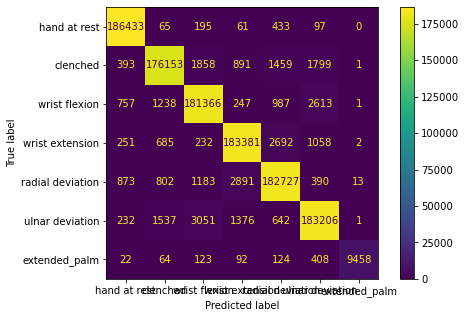

In [33]:
# Print cohen kappa score
print("Cohen Kappa Score: ", cohen_kappa_score(class_test, class_prediction))

# Check results
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(class_test, class_prediction),
    display_labels=["hand at rest", "clenched", "wrist flexion", 
                    "wrist extension", "radial deviation", 
                    "ulnar deviation", "extended_palm"],
)

cmp.plot(ax=ax)
plt.show()